<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-06-05 10:25:22
-------------------
qualified stocks: 93
with latest results: 31
still star stocks: 17
-------------------
Initial Investment:  1.17 C
CY Investment:  1.44 C
Reserve:  1.64 L
Current:  1.32 C
-------------------
Today PnL: 54.98 K (0.42%)
Current PnL: -16.12 L (-11.23%)
CY Booked + Current PnL: -11.13 L (-7.76%)
-------------------
Total profit:  4.22 L
Total loss:  -20.34 L
-------------------
Total Booked + Current PnL: 15.85 L (13.6%)
Total Booked PnL: 31.97 L (27.43%)
Curr Year Booked PnL: 4.99 L (3.77%)
Prev Year Booked PnL: 26.98 L (23.15%)
Est FTT:  2.12 C
Est FTT PnL: 79.08 L (59.68%)
-------------------
Est LTT:  2.74 C
Est LTT PnL: 1.41 C (106.58%)
Deployed:  1.17 C
Current:  1.32 C
CAGR/XIRR %: 9.14%


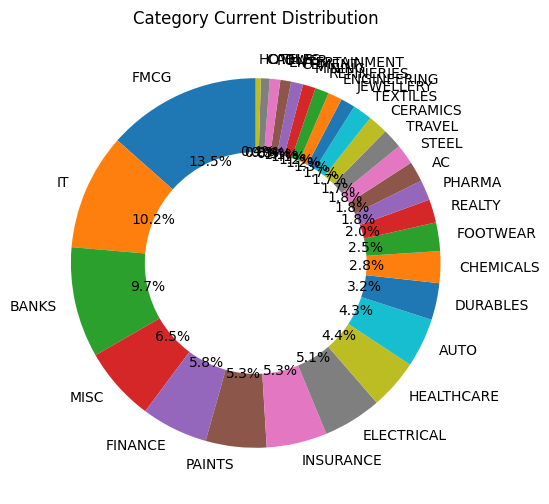

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSI_14', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
50,LICI,785.05,983.00,-13.37,H-LC,78.0,89.25,237696.0,43004.0,6085.0,...,2.56,25.21,202.0,31.0,7.07,1.82,31.44,XY25,NTT,INSURANCE
4,ADANIPORTS,1103.69,1583.00,3.56,M-LC,69.0,64.52,103880.0,25518.0,8508.0,...,8.19,43.43,NaN,70.0,3.00,0.79,38.94,XY24,NTT,MISC
62,RELIANCE,1291.83,1526.00,5.38,X-LC,61.0,29.03,157265.0,16456.0,9074.0,...,5.77,18.13,67.0,19.0,1.81,1.20,24.18,XY25,NTT,REFINERIES
56,PFIZER,4245.50,6318.30,-7.13,H-SC,93.0,98.92,133296.0,35650.0,12023.0,...,9.02,48.82,NaN,134.0,2.97,1.02,48.08,X40,ATH,PHARMA
85,UNIONBANK,123.87,163.00,-1.54,M-LC,72.0,91.40,173142.0,32302.0,12189.0,...,7.04,31.59,-39.0,79.0,2.65,1.32,50.40,XY24,NTT,BANKS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,SFL,1016.35,1287.00,28.00,H-SC,52.0,15.05,169042.0,-93176.0,163007.0,...,96.43,26.63,-13.0,136.0,-0.57,1.29,5.10,XY24,NTT,MISC
60,RBLBANK,230.61,388.00,37.93,M-SC,59.0,46.24,215697.0,-18603.0,178511.0,...,82.76,68.25,-48.0,222.0,-0.10,1.65,42.04,XY24,NTT,BANKS
63,REPCOHOME,515.07,880.00,-56.78,H-SC,56.0,40.86,160195.0,-44803.0,190039.0,...,118.63,70.85,-44.0,121.0,-0.24,1.22,29.32,XY24,NTT,FINANCE
11,BANDHANBNK,214.25,400.00,-34.39,H-SC,54.0,36.56,195066.0,-53464.0,268937.0,...,137.87,86.70,-29.0,115.0,-0.20,1.49,29.05,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,564.75,810.00,150.00,H-SC,59.0,68.82,134949.0,-51983.0,133168.0,...,98.68,43.43,20.0,133.0,-0.39,1.03,29.10,X40N,BTT,FINANCE
2,ABB,5551.76,7934.00,-33.83,H-LC,68.0,65.59,236145.0,19626.0,73276.0,...,31.03,42.91,NaN,27.0,0.27,1.80,23.43,AR,NTT,ELECTRICAL
4,ADANIPORTS,1103.69,1583.00,3.56,M-LC,69.0,64.52,103880.0,25518.0,8508.0,...,8.19,43.43,NaN,70.0,3.00,0.79,38.94,XY24,NTT,MISC
5,ALKYLAMINE,2347.98,4567.52,-10.39,X-SC,65.0,78.49,83446.0,-17517.0,112961.0,...,135.37,94.53,-59.0,58.0,-0.16,0.64,23.72,SR,ATH,CHEMICALS
6,APOLLOHOSP,6904.43,8285.00,-23.95,H-LC,49.0,22.58,103665.0,99.0,20609.0,...,19.88,20.00,NaN,35.0,0.00,0.79,16.80,AR,BTT,HEALTHCARE
7,ASIANPAINT,2961.56,4250.00,-23.09,X-LC,37.0,4.30,152742.0,-48644.0,136261.0,...,89.21,43.51,-18.0,5.0,-0.36,1.17,5.35,X40,BTT,PAINTS
12,BANKINDIA,113.49,190.00,-26.47,M-MC,68.0,60.22,142022.0,12870.0,74192.0,...,52.24,67.42,-12.0,156.0,0.17,1.09,38.13,XR,NTT,BANKS
13,BATAINDIA,1550.24,2096.00,-32.02,M-SC,45.0,31.18,101592.0,-27078.0,72374.0,...,71.24,35.20,-8.0,197.0,-0.37,0.78,3.65,X40,NTT,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-17.32,H-MC,62.0,50.54,183622.0,6565.0,31932.0,...,17.39,21.75,-14.0,104.0,0.21,1.40,31.35,XY24,NTT,PAINTS
15,BRITANNIA,4983.33,6446.05,11.23,X-LC,57.0,45.16,255047.0,25814.0,41471.0,...,16.26,29.35,239.0,8.0,0.62,1.95,21.19,XY25,ATH,FMCG


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,2579.05,3906.00,-35.90,M-MC,44.0,25.81,137751.0,-50520.0,147394.0,...,107.00,51.45,-37.0,154.0,-0.34,1.05,4.31,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.00,3.56,M-LC,69.0,64.52,103880.0,25518.0,8508.0,...,8.19,43.43,NaN,70.0,3.00,0.79,38.94,XY24,NTT,MISC
9,ATULAUTO,624.44,844.00,3521.62,M-SC,49.0,27.96,112926.0,-34442.0,86253.0,...,76.38,35.16,-49.0,211.0,-0.40,0.86,15.34,XY24,NTT,AUTO
10,AWL,342.88,485.00,-68.35,H-MC,51.0,12.90,169545.0,-48184.0,138433.0,...,81.65,41.45,-36.0,85.0,-0.35,1.30,13.26,XY24,NTT,FMCG
11,BANDHANBNK,214.25,400.00,-34.39,H-SC,54.0,36.56,195066.0,-53464.0,268937.0,...,137.87,86.70,-29.0,115.0,-0.20,1.49,29.05,XY24,NTT,BANKS
14,BERGEPAINT,558.54,680.00,-17.32,H-MC,62.0,50.54,183622.0,6565.0,31932.0,...,17.39,21.75,-14.0,104.0,0.21,1.40,31.35,XY24,NTT,PAINTS
15,BRITANNIA,4983.33,6446.05,11.23,X-LC,57.0,45.16,255047.0,25814.0,41471.0,...,16.26,29.35,239.0,8.0,0.62,1.95,21.19,XY25,ATH,FMCG
17,CAMPUS,294.86,393.00,-18.82,M-SC,78.0,92.47,169192.0,1417.0,54429.0,...,32.17,33.28,-16.0,182.0,0.03,1.29,30.99,XY24,NTT,FOOTWEAR
21,COALINDIA,406.65,512.15,4.70,L-LC,48.0,38.71,146076.0,-4384.0,43414.0,...,29.72,25.94,NaN,145.0,-0.10,1.12,11.46,XY25,ATH,MINING
23,COLPAL,2812.64,3767.14,2.14,X-MC,44.0,8.60,143231.0,-19902.0,75268.0,...,52.55,33.94,-21.0,48.0,-0.26,1.09,6.20,XY25,ATH,FMCG


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,AARTIIND,487.04,919.00,39.17,M-SC,63.0,61.29,80703.0,-633.0,72770.0,...,90.17,88.69,-8.0,205.0,-0.01,0.62,36.09,XR,NTT,CHEMICALS
2,ABB,5551.76,7934.00,-33.83,H-LC,68.0,65.59,236145.0,19626.0,73276.0,...,31.03,42.91,NaN,27.0,0.27,1.80,23.43,AR,NTT,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-10.39,X-SC,65.0,78.49,83446.0,-17517.0,112961.0,...,135.37,94.53,-59.0,58.0,-0.16,0.64,23.72,SR,ATH,CHEMICALS
6,APOLLOHOSP,6904.43,8285.00,-23.95,H-LC,49.0,22.58,103665.0,99.0,20609.0,...,19.88,20.00,NaN,35.0,0.00,0.79,16.80,AR,BTT,HEALTHCARE
8,ASIANTILES,75.41,137.00,6544.44,M-SC,74.0,97.85,72911.0,-20899.0,97518.0,...,133.75,81.67,-16.0,214.0,-0.21,0.56,41.19,XR,NTT,CERAMICS
12,BANKINDIA,113.49,190.00,-26.47,M-MC,68.0,60.22,142022.0,12870.0,74192.0,...,52.24,67.42,-12.0,156.0,0.17,1.09,38.13,XR,NTT,BANKS
16,BSOFT,628.85,844.81,-15.92,M-SC,46.0,30.11,70490.0,-39559.0,77349.0,...,109.73,34.34,-28.0,184.0,-0.51,0.54,16.05,XR,ATH,IT
18,CAMS,3643.00,5250.99,4.19,H-SC,67.0,66.67,116855.0,14851.0,30172.0,...,25.82,44.14,261.0,112.0,0.49,0.89,33.17,XR,ATH,MISC
20,CIPLA,1495.00,1795.00,-22.55,H-LC,50.0,11.83,99569.0,-596.0,20700.0,...,20.79,20.07,NaN,32.0,-0.03,0.76,7.32,AR,BTT,PHARMA
22,COFFEEDAY,59.14,80.00,-59.76,L-SC,46.0,5.38,58157.0,-55392.0,95441.0,...,164.11,35.27,NaN,239.0,-0.58,0.44,42.34,XR,NTT,HOTELS


In [8]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.64
1,20,35.33
2,30,48.36


In [9]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,31.65
AR,15.04
XY25,14.57
X40N,13.32
X40,12.51
XR,10.37
X200,1.41
SR,1.12


In [10]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,20.07
M-SC,19.29
X-LC,16.24
H-LC,9.14
H-MC,8.51
M-LC,7.68
X-MC,5.93
M-MC,5.55
X-SC,4.16


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          8.42
          H-SC          8.13
AR        H-LC          7.32
XY25      X-LC          7.31
X40       X-LC          5.32
XY24      M-LC          4.88
X40N      H-SC          4.85
          M-SC          4.83
XY24      M-MC          3.74
XR        H-SC          3.33
AR        H-SC          2.74
XY24      H-MC          2.70
XR        M-SC          2.31
X40       M-SC          2.20
AR        X-LC          2.20
X40       H-MC          2.18
XY25      H-LC          1.82
X40       X-MC          1.79
XY25      M-LC          1.63
X40N      X-MC          1.59
XY24      X-MC          1.46
X200      X-LC          1.41
XY24      X-SC          1.40
X40N      X-SC          1.28
XR        M-LC          1.17
AR        H-MC          1.13
XY25      L-LC          1.12
XR        M-MC          1.09
XY25      X-MC          1.09
          H-MC          1.03
X40       H-SC          1.02
XR        L-SC          0.93
XY24      L-SC          0.92
XR        X-SC          0.84
X40N      H-MC          0.77
AR        M-MC          0.72
XR        H-MC          0.70
SR        X-SC          0.64
XY25      M-SC          0.57
AR        M-SC          0.48
SR        M-SC          0.48
AR        L-SC          0.45
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,13.46,-1.82,33.71
IT,10.18,-17.12,80.73
BANKS,9.68,-10.58,61.42
MISC,6.48,-27.30,83.60
FINANCE,5.82,-25.27,84.75
PAINTS,5.31,-18.31,53.32
INSURANCE,5.30,3.69,25.17
ELECTRICAL,5.12,-4.79,50.25
HEALTHCARE,4.37,-3.85,34.84


In [13]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,68.61,8981188.0,-9.68,-869741.0,52.47,4712348.0


In [14]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,65.13,8523948.0,-5.98,-509809.0,44.67,3807841.0


In [15]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2830276.0
AR,1257436.0
X40N,1206571.0
XR,1094647.0
X40,774117.0
XY25,472151.0
SR,198186.0
X200,74270.0


In [16]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,2233734.0
H-SC,2214648.0
X-LC,765124.0
M-MC,542604.0
H-MC,514381.0
X-SC,389356.0
X-MC,353652.0
M-LC,298653.0
L-SC,296439.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          952465.0
          H-SC          927356.0
AR        H-SC          540675.0
X40N      H-SC          496333.0
          M-SC          471603.0
X40       X-LC          390782.0
XY24      M-MC          386857.0
XR        M-SC          289161.0
AR        H-LC          249564.0
XR        H-SC          238261.0
X40       M-SC          219809.0
XY24      M-LC          176462.0
          H-MC          170365.0
AR        X-LC          166334.0
XR        L-SC          157282.0
XY25      X-LC          133738.0
          M-SC          121289.0
X40N      X-SC          117923.0
XR        X-SC          115612.0
          H-MC          113189.0
SR        X-SC          112961.0
XR        M-LC          106950.0
XY24      X-MC           95909.0
AR        M-SC           94182.0
X40N      X-MC           93457.0
X40       X-MC           89018.0
SR        M-SC           85225.0
AR        M-MC           81555.0
XY24      L-SC           78002.0
XY25      H-MC           77116.0
          X-MC           75268.0
X200      X-LC           74270.0
XR        M-MC           74192.0
AR        H-MC           63971.0
X40       H-MC           62485.0
AR        L-SC           61155.0
XY25      L-LC           43414.0
XY24      X-SC           42860.0
X40N      H-MC           27255.0
XY25      M-LC           15241.0
X40       H-SC           12023.0
XY25      H-LC            6085.0
Name: FTT Amt, dtype: float64

In [18]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,23
H-SC,20
X-LC,10
H-MC,8
H-LC,6
M-LC,6
M-MC,5
X-SC,5
X-MC,5
